# From Seaborn to Matplotlib

As previously mentioned, one of the major advantages of seaborn is that you can start in seaborn, then drop down into matplotlib to make more fine-grained adjustments using the matplotlib API.

To move from `seaborn.objects` to `matplotlib`, the easiest way to is to:

- Create a matplotlib subplot object (`fig, ax = plt.subplots()`),
- Create the seaborn.objects plot
- use the `.on(ax).plot()` method to assign the seaborn.objects plot to the matplotlib `axes` object.
- work with the `matplotlib` axes object.

Note that this workflow doesn't always seem to result in an easy to output-in-jupyter-notebook result, but if you save the axes object and then look at it works well. I *think* if don't try to look at the output at the intermediate steps, you can see the final result, but if you look at the results as you go it seems to break.

In [1]:
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn_objects_recipes as sor


# Load the penguins dataset
import seaborn as sns

penguins = sns.load_dataset("penguins").dropna()

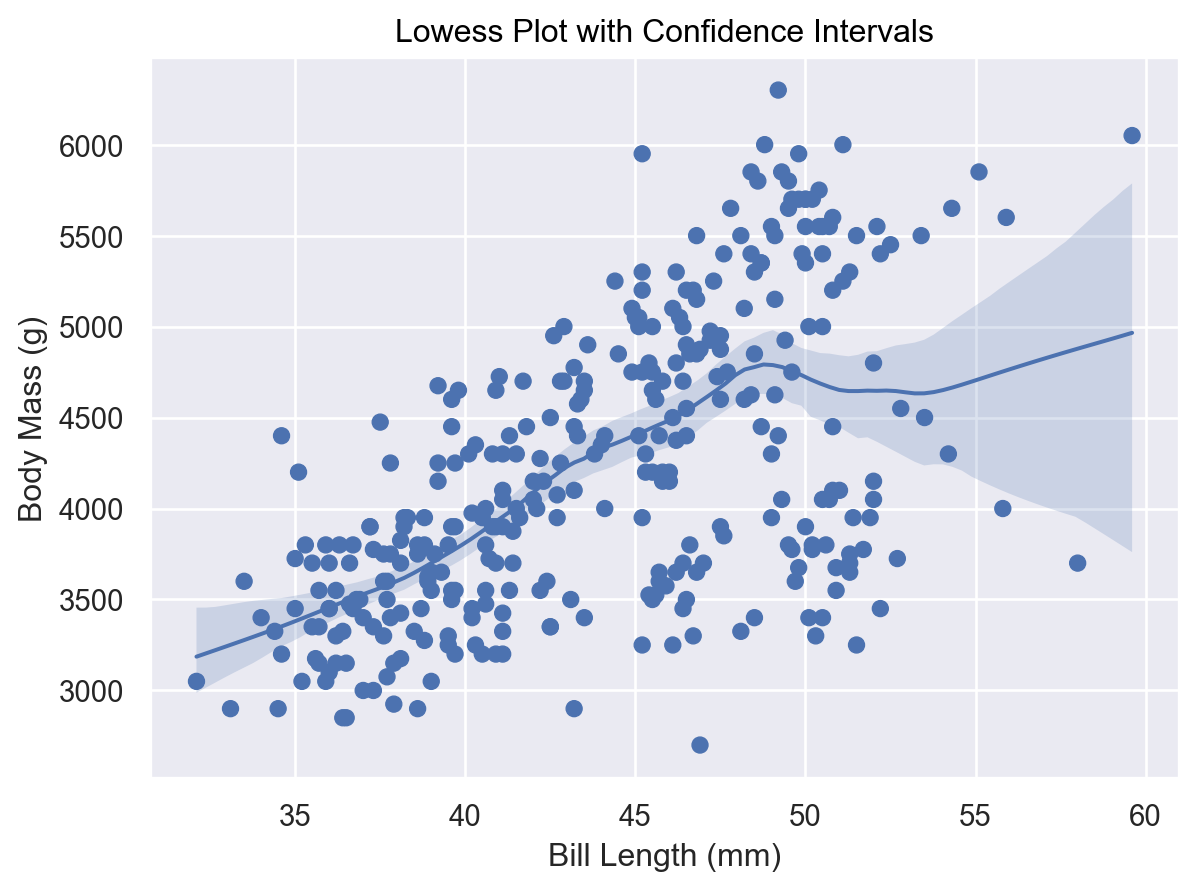

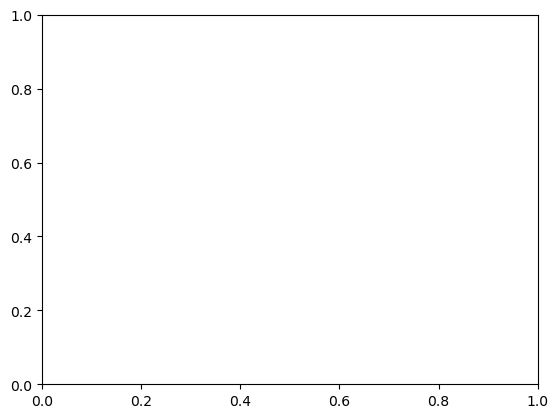

In [2]:
# Create matplotlib subplot axes object
fig, ax = plt.subplots()

# Make a seaborn objects plot
plot = (
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.4, gridsize=100, num_bootstrap=200, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .label(
        x="Bill Length (mm)",
        y="Body Mass (g)",
        title="Lowess Plot with Confidence Intervals",
    )
)
plot

In [3]:
# Assign to axes object and save.
# Note that with this code flow (where output spread across cells)
# you don't seem to be able to show the result in Python.
plot.on(ax).plot()
ax.set_facecolor("white")
ax.set_title("This is my new title!")
fig.savefig("./img/modified_plot.png")

Now load that image:

![modified plot](./img/modified_plot.png)

## Seeing Output by Combining Code

And as I noted above, if you put all the code in one cell, it does *seem* to allow you to see the output live.

Text(0.5, 1.0, 'This is my new title!')

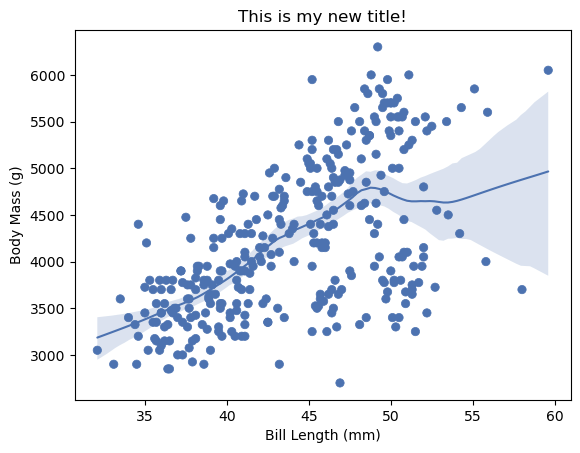

In [4]:
# Create matplotlib subplot axes object
fig, ax = plt.subplots()

# Make a seaborn objects plot
plot = (
    so.Plot(penguins, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(
        so.Line(),
        lowess := sor.Lowess(frac=0.4, gridsize=100, num_bootstrap=200, alpha=0.95),
    )
    .add(so.Band(), lowess)
    .label(
        x="Bill Length (mm)",
        y="Body Mass (g)",
        title="Lowess Plot with Confidence Intervals",
    )
)
plot.on(ax).plot()
ax.set_facecolor("white")
ax.set_title("This is my new title!")

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn.objects as so
import seaborn_objects_recipes as sor
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
set_matplotlib_formats("retina")
nick_theme = {**style.library["seaborn-v0_8-whitegrid"]}
nick_theme.update({"font.sans-serif": ["Fira Sans", "Arial", "sans-serif"]})

fig, ax = plt.subplots()
(so.Plot(, x="", y="")
.add(so.Dots())
.add(so.Line(), lowess := sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95))
.add(so.Band(), lowess)
.label(title="")
.theme(nick_theme)
.on(ax).plot()
)